/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


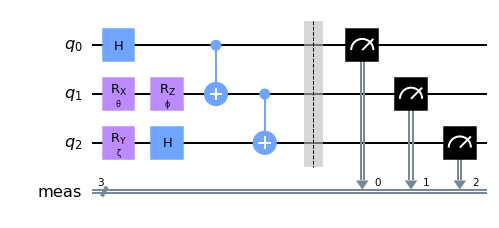

In [15]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
import numpy as np

# Create a parameterized quantum circuit with 3 qubits
theta = Parameter('θ')
phi = Parameter('ϕ')
zeta = Parameter('ζ')
qc = QuantumCircuit(3)
qc.h(0)
qc.rx(theta, 1)
qc.rz(phi, 1)
qc.ry(zeta, 2)
qc.h(2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Display the circuit
qc.draw('mpl')


/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_43998/1137875150.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})


Result for θ = 0.00, ϕ = 0.00, ζ = 0.00: {'100': 249, '011': 274, '000': 259, '111': 242}
Result for θ = 0.00, ϕ = 0.00, ζ = 0.70: {'100': 91, '011': 78, '000': 435, '111': 420}
Result for θ = 0.00, ϕ = 0.00, ζ = 1.40: {'100': 1, '011': 5, '000': 499, '111': 519}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.09: {'100': 33, '111': 479, '011': 31, '000': 481}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.79: {'100': 173, '111': 339, '011': 166, '000': 346}
Result for θ = 0.00, ϕ = 0.00, ζ = 3.49: {'100': 357, '111': 156, '011': 331, '000': 180}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.19: {'111': 38, '000': 28, '011': 476, '100': 482}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.89: {'111': 2, '100': 542, '000': 5, '011': 475}
Result for θ = 0.00, ϕ = 0.00, ζ = 5.59: {'111': 90, '000': 96, '011': 417, '100': 421}
Result for θ = 0.00, ϕ = 0.00, ζ = 6.28: {'100': 262, '111': 269, '011': 258, '000': 235}
Result for θ = 0.00, ϕ = 0.70, ζ = 0.00: {'111': 273, '100': 254, '011': 248, '000': 249}
Result for θ = 0.00, ϕ = 0

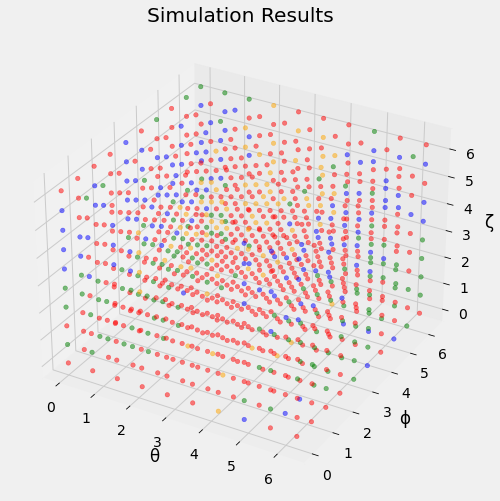

In [26]:
# Define a range of parameter values
theta_values = np.linspace(0, 2 * np.pi, 10)
phi_values = np.linspace(0, 2 * np.pi, 10)
zeta_values = np.linspace(0, 2 * np.pi, 10)

# Simulate the circuit for each combination of parameter values
simulator = Aer.get_backend('aer_simulator')
results = []

for theta_val in theta_values:
    for phi_val in phi_values:
        for zeta_val in zeta_values:
            # Set the parameter values
            bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})
            # Transpile the circuit for the simulator
            compiled_circuit = transpile(bound_circuit, simulator)
            # Run the simulation
            result = simulator.run(compiled_circuit).result()
            # Get the counts of the result
            counts = result.get_counts()
            results.append((theta_val, phi_val, zeta_val, counts))

x_coords = []
y_coords = []
z_coords = []
colors = []

for theta_val, phi_val, zeta_val, result in results:
    # Print the result
    print(f'Result for θ = {theta_val:.2f}, ϕ = {phi_val:.2f}, ζ = {zeta_val:.2f}: {result}')
    
    # Determine the color based on the most frequent outcome
    max_state = max(result, key=result.get)
    if max_state == '000':
        color = 'green'
    elif max_state == '100':
        color = 'blue'
    elif max_state == '101':
        color = 'orange'
    else:
        color = 'red'
    
    # Append the coordinates and color to the arrays
    x_coords.append(theta_val)
    y_coords.append(phi_val)
    z_coords.append(zeta_val)
    colors.append(color)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors, alpha=0.5)
ax.set_xlabel('θ')
ax.set_ylabel('ϕ')
ax.set_zlabel('ζ')
plt.title('Simulation Results')
plt.show()

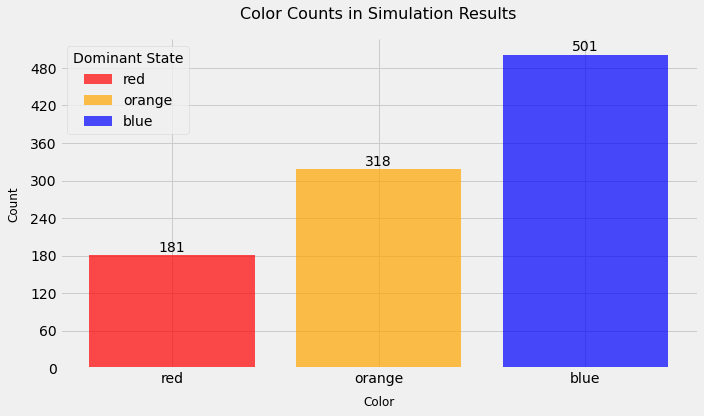

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

# Use a fancy style
plt.style.use('fivethirtyeight')

# Count the occurrences of each color
color_counts = Counter(colors)

# Extract colors and their counts for plotting
colors_for_plot = ['red', 'orange', 'blue']
counts_for_plot = [color_counts[color] for color in colors_for_plot]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(colors_for_plot, counts_for_plot, color=colors_for_plot, alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', color='black')

# Set labels, title, and legend
ax.set_xlabel('Color', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Color Counts in Simulation Results', fontsize=16, pad=20)
ax.legend(bars, colors_for_plot, title='Dominant State')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Use integer y-axis labels
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers

# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
error_rates = []
for theta_val, phi_val, zeta_val, result in results:
    total_counts = sum(result.values())
    error_counts = total_counts - result.get('000', 0)  # Assuming '000' is the expected outcome
    error_rate = error_counts / total_counts
    error_rates.append(error_rate)

# Make sure the DataFrame is initialized with the correct number of rows
df = pd.DataFrame({
    'theta': [theta_val for theta_val, _, _, _ in results],
    'phi': [phi_val for _, phi_val, _, _ in results],
    'zeta': [zeta_val for _, _, zeta_val, _ in results],
    'error_rate': error_rates
})

# Prepare your data
X = df[['theta', 'phi', 'zeta']].values  # Features
y = df['error_rate'].values              # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'swish']

# Optimizers to try
optimizers_to_try = [
    optimizers.Adagrad(),
    optimizers.Adamax(),
    optimizers.Nadam(),
]

# Results dictionary
results = {}

for activation in activation_functions:
    for opt in optimizers_to_try:
        # Build the model with the chosen activation function
        model = models.Sequential([
            layers.Dense(128, activation=activation, input_shape=(3,)),
            layers.Dense(128, activation=activation),
            layers.Dense(64, activation=activation),
            layers.Dense(64, activation=activation),
            layers.Dense(32, activation=activation),
            layers.Dense(1)  # Output layer: no activation, we want a regression output
        ])

        # Compile the model with the chosen optimizer
        model.compile(optimizer=opt, loss='mean_squared_error')

        # Train the model
        history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, verbose=0)

        # Evaluate the model
        loss = model.evaluate(X_test, y_test, verbose=0)
        
        # Save the results
        results[(activation, opt.get_config()['name'])] = loss
        print(f"Activation: {activation}, Optimizer: {opt.get_config()['name']}, Test loss: {loss}")

# You can now analyze the results dictionary to find the best combination of activation function and optimizer.


Activation: relu, Optimizer: Adagrad, Test loss: 0.006655364762991667
Activation: relu, Optimizer: Adamax, Test loss: 0.0006630735006183386
Activation: relu, Optimizer: Nadam, Test loss: 0.0002730907581280917


KeyError: in user code:

    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1130, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_112/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adagrad.'


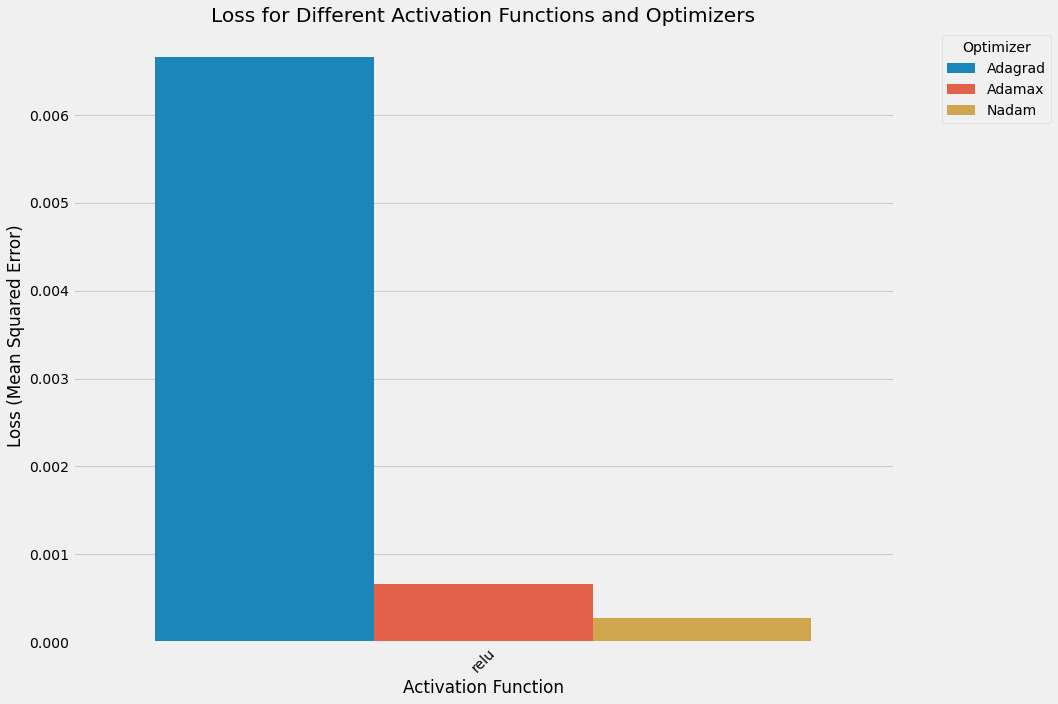

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(list(results.items()), columns=['Combination', 'Loss'])
results_df[['Activation', 'Optimizer']] = pd.DataFrame(results_df['Combination'].tolist(), index=results_df.index)
results_df.drop(columns='Combination', inplace=True)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(data=results_df, x='Activation', y='Loss', hue='Optimizer')
plt.title('Loss for Different Activation Functions and Optimizers')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Activation Function')
plt.xticks(rotation=45)
plt.legend(title='Optimizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Epoch 1/200
20/20 [==============================] - 3s 11ms/step - loss: 0.1620 - val_loss: 0.0548
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.0457
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.0309
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.0179
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0087
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.0072
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0082
Epoch 8/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0046
Epoch 9/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 11

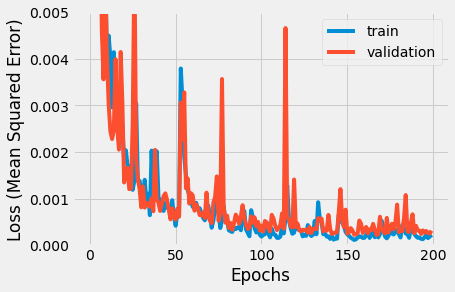

Actual value: 0.9921875, Predicted value: 0.9809458255767822
Actual value: 0.9990234375, Predicted value: 1.0003777742385864
Actual value: 0.853515625, Predicted value: 0.851972758769989
Actual value: 0.9365234375, Predicted value: 0.9330695271492004
Actual value: 0.9912109375, Predicted value: 0.9842169880867004
Actual value: 0.970703125, Predicted value: 0.9759765863418579
Actual value: 0.9921875, Predicted value: 0.9967802166938782
Actual value: 0.9833984375, Predicted value: 0.9804672598838806
Actual value: 0.771484375, Predicted value: 0.7953909635543823
Actual value: 0.9716796875, Predicted value: 0.968027651309967


In [27]:
from tensorflow import keras
from tensorflow.keras import layers, models
import pandas as pd

# Assuming you have a DataFrame 'df' with 'theta', 'phi', 'zeta', and 'error_rate' columns
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
error_rates = []
for theta_val, phi_val, zeta_val, result in results:
    total_counts = sum(result.values())
    error_counts = total_counts - result.get('000', 0)  # Assuming '000' is the expected outcome
    error_rate = error_counts / total_counts
    error_rates.append(error_rate)

# Make sure the DataFrame is initialized with the correct number of rows
df = pd.DataFrame({
    'theta': [theta_val for theta_val, _, _, _ in results],
    'phi': [phi_val for _, phi_val, _, _ in results],
    'zeta': [zeta_val for _, _, zeta_val, _ in results],
    'error_rate': error_rates
})

# Prepare your data
X = df[['theta', 'phi', 'zeta']].values  # Features
y = df['error_rate'].values              # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model with additional layers
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer: no activation, we want a regression output
])

# Compile the model
model.compile(optimizer='nadam', loss='mean_squared_error')

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

# Predictions
predictions = model.predict(X_test)

# Plotting the history with adjusted y-axis limits
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.ylim(0, 0.005)  # Set the y-axis limits to range from 0 to 0.1
plt.show()

# Compare actual vs predicted values (maybe for a few samples)
for i in range(10):
    print(f"Actual value: {y_test[i]}, Predicted value: {predictions[i][0]}")

